# 🧾 Time Series Analysis – Gray–Scott Reaction–Diffusion

## Group 5: Jhon Villacís, Jorge Pico

## **1. Objective**
Analyze a real spatiotemporal dataset (Gray–Scott reaction–diffusion) using autocorrelation, ARIMA, Fourier Transform, and Wavelet Transform.

In [1]:
# import h5py

# def print_attrs(name, obj):
#     print(f"\n{name}")  # dataset/group path
#     for key, val in obj.attrs.items():
#         print(f"   {key}: {val}")

# # Open file (read-only)
# # with h5py.File('/home/deck/Documents/Python/Data&ML/week3/datasets/datasets/gray_scott_reaction_diffusion/data/test/gray_scott_reaction_diffusion_spirals_F_0.018_k_0.051.hdf5', "r") as f:
# with h5py.File('/home/deck/Documents/Python/Data&ML/week3/datasets/datasets/gray_scott_reaction_diffusion/data/train/gray_scott_reaction_diffusion_maze_F_0.029_k_0.057.hdf5', "r") as f:
#     print("File-level attributes:")
#     for key, val in f.attrs.items():
#         print(f"   {key}: {val}")
    
#     print("\nAttributes in groups/datasets:")
#     f.visititems(print_attrs)

## **2. Load Packages**
Install and import the required Python packages.

In [2]:
# !pip install the_well[benchmark]
from the_well.utils.download import well_download
from the_well.data import WellDataset

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

base_path = "./datasets"  # path/to/storage

## **3. Download Dataset**
Use the tutorial from [The Well GitHub repository](https://github.com/PolymathicAI/the_well/blob/master/docs/tutorials/dataset.ipynb) to load the dataset `gray_scott_reaction_diffusion`.

In [3]:
# base_path = "./datasets"  # path/to/storage
# well_download(base_path=base_path, dataset="gray_scott_reaction_diffusion", split="train")
# well_download(base_path=base_path, dataset="gray_scott_reaction_diffusion", split="test")

## **4. Select a Random Trajectory**
- The dataset has 120 repetitions.
- Select a random number `n` between 0 and 119.
- Extract the trajectory using:

```python
x = dataset[n]["input_fields"]
```
- Confirm that `x` has shape `(2, 1000, 128, 128)`.

In [4]:
dataset = WellDataset(
    well_base_path=f"{base_path}/datasets",
    well_dataset_name="gray_scott_reaction_diffusion",
    well_split_name="test",
    n_steps_input=1000,
    n_steps_output=1,
    use_normalization=False,
)

len(dataset)

120

In [5]:
# Test data
n = 25
x = dataset[n]['input_fields']
x.shape

torch.Size([1000, 128, 128, 2])

## **5. Extract Random Points**
- Choose **3–5 random spatial points** `(i, j)` in the 128×128 grid.
- For each point, extract the **concentration of A**:

```python
series = x[0, :, i, j]
```
- **Important:** In many cases, the time series will be almost flat and not very interesting.
  Play with different random points until you find curves with visible dynamics or patterns to analyze.
- Plot the time series for each selected point.

In [6]:
# n = 77
# n = np.random.randint(120)
# print(n)
# x = dataset[n]['input_fields']

# plt.figure()
# for i in range(10):
#     point = np.random.randint(128,size=2)
#     print(f'{i}: {point}')
#     plt.plot(x[:, point[0], point[1], 0], label=str(i))
# plt.legend()
# plt.show()
# plt.close()

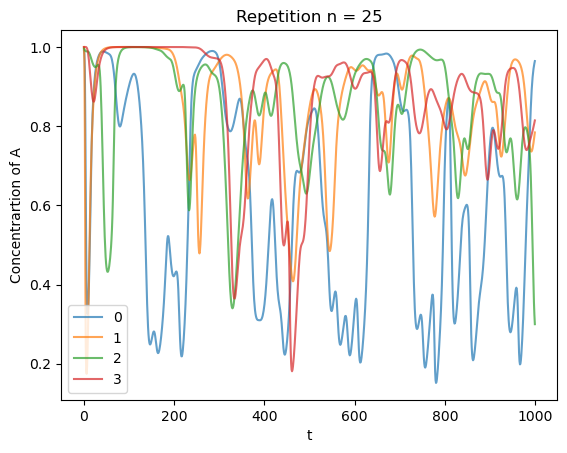

In [7]:
my_points1 = [[83,  7],[ 51, 126],[46, 83],[112,  67]]
my_series1 = np.array([x[:, i[0], i[1], 0] for i in my_points1])


plt.figure()
c = 0
for i in my_series1:
    plt.plot(i,label=str(c),alpha=0.7)
    c+=1
plt.legend()
plt.xlabel(r't')
plt.ylabel(r'Concentrartion of A')
plt.title("Repetition n = 25")
plt.show()
plt.close()

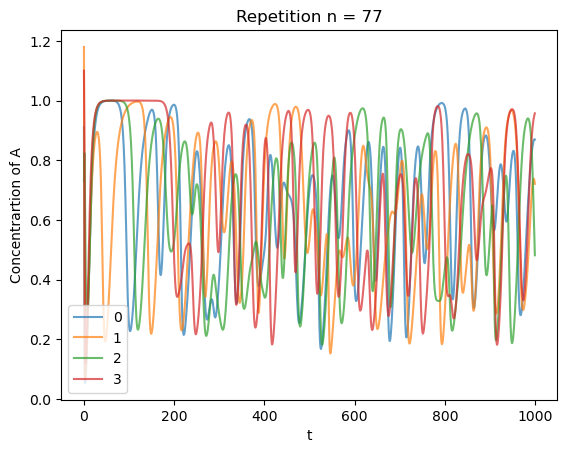

In [8]:
n2 = 77
x2 = dataset[n2]['input_fields']
my_points2 = [[87, 88],[121, 110],[91, 17],[124,  32]]
my_series2 = np.array([x2[:, i[0], i[1], 0] for i in my_points2])


plt.figure()
c = 0
for i in my_series2:
    plt.plot(i,label=str(c),alpha=0.7)
    c+=1
plt.legend()
plt.xlabel(r't')
plt.ylabel(r'Concentrartion of A')
plt.title("Repetition n = 77")
plt.show()
plt.close()

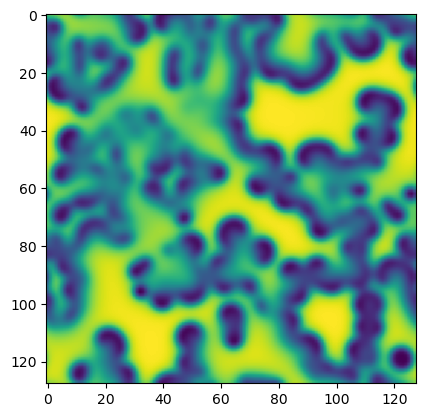

In [9]:
plt.imshow(x2[600,:,:,0])
plt.show()

## **6. Autocorrelation Analysis**
- Compute and plot the autocorrelation function for each selected point.
- Interpret whether the signal is strongly correlated over time.

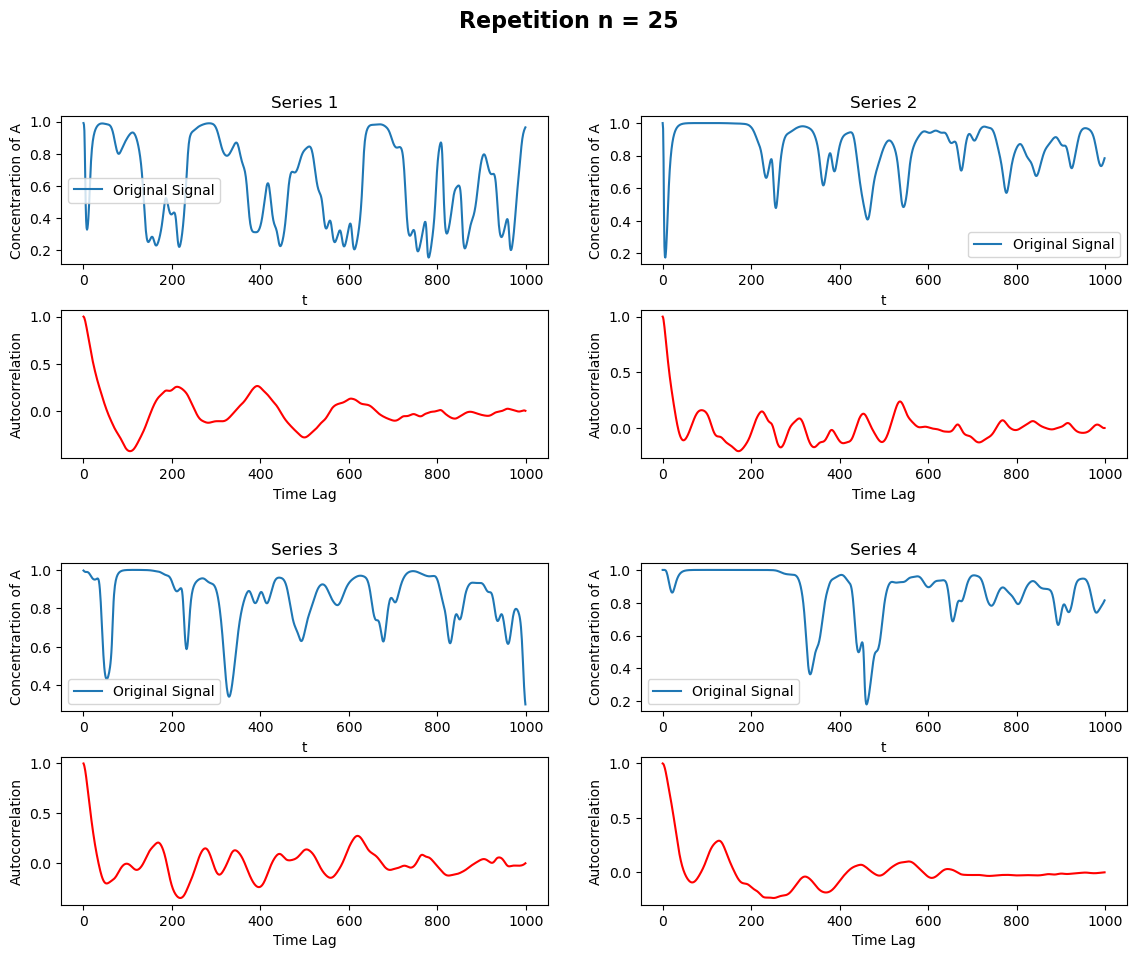

In [10]:
fig = plt.figure(figsize=(12, 10))

for idx, i in enumerate(my_series1):
    # Compute autocorrelation
    x_centered = i - np.mean(i)
    acf = np.correlate(x_centered, x_centered, mode='full') 
    acf = acf[acf.size // 2:] / np.max(acf)

    # Define where this block of 2x1 subplots goes in the 2x2 grid
    outer = gridspec.GridSpec(2, 2, figure=fig)   # 2x2 grid overall
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[idx])  # each cell = 2x1

    # Top subplot: original signal
    ax0 = fig.add_subplot(inner[0])
    ax0.plot(i, label="Original Signal")
    ax0.set_xlabel("t")
    ax0.set_ylabel(r'Concentrartion of A')
    ax0.legend()

    # Bottom subplot: autocorrelation
    ax1 = fig.add_subplot(inner[1])
    ax1.plot(acf, color="red")
    ax1.set_xlabel(r"Time Lag")
    ax1.set_ylabel(r"Autocorrelation")

    # Add title for the block
    ax0.set_title(f"Series {idx+1}")

fig.suptitle("Repetition n = 25", fontsize=16, weight="bold")
plt.tight_layout(pad=3)
plt.show()
plt.close()

In this first repetition, we observe a weak autocorrelartion, since the autocorrelation plot decays quickly and the flatens out. 

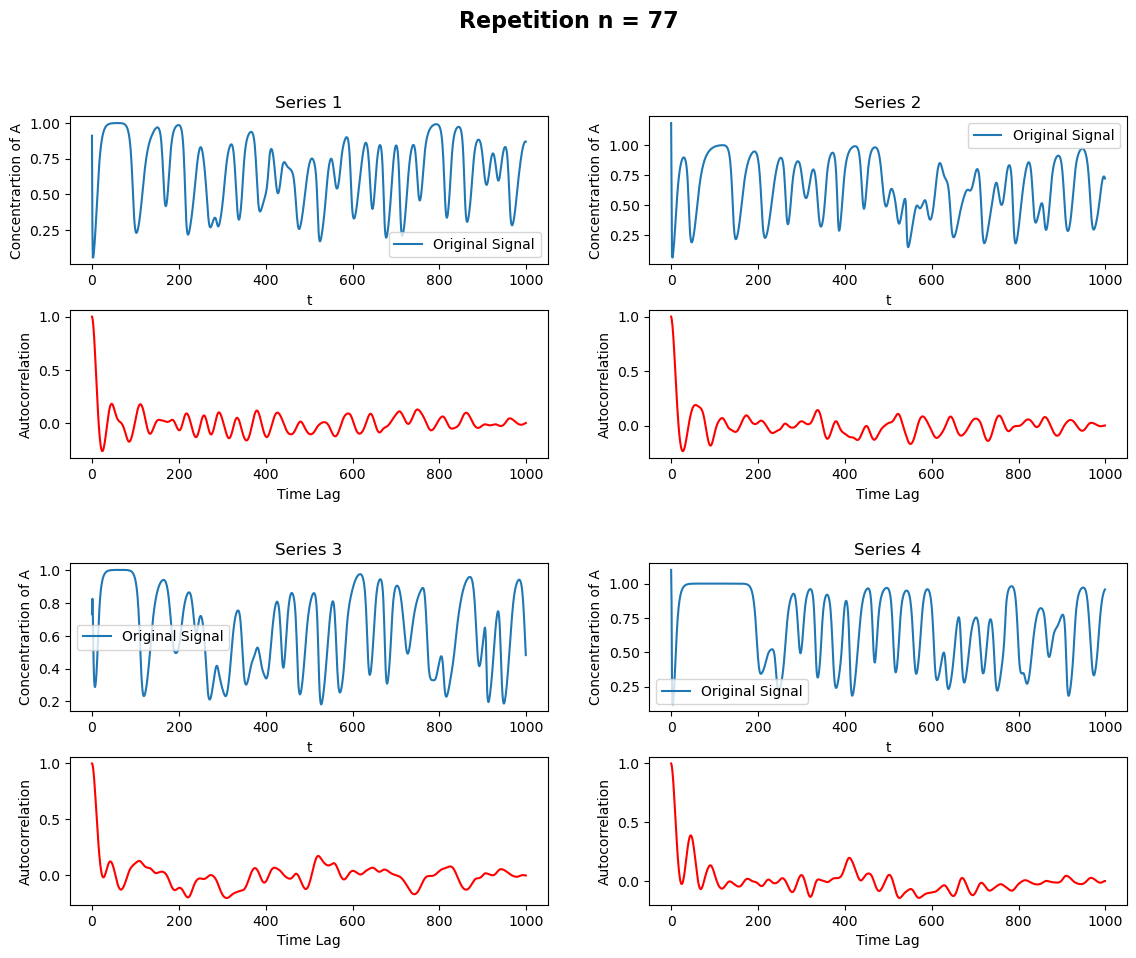

In [11]:
fig = plt.figure(figsize=(12, 10))

for idx, i in enumerate(my_series2):
    # Compute autocorrelation
    x_centered = i - np.mean(i)
    acf = np.correlate(x_centered, x_centered, mode='full') 
    acf = acf[acf.size // 2:] / np.max(acf)

    # Define where this block of 2x1 subplots goes in the 2x2 grid
    outer = gridspec.GridSpec(2, 2, figure=fig)   # 2x2 grid overall
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[idx])  # each cell = 2x1

    # Top subplot: original signal
    ax0 = fig.add_subplot(inner[0])
    ax0.plot(i, label="Original Signal")
    ax0.set_xlabel("t")
    ax0.set_ylabel(r'Concentrartion of A')
    ax0.legend()

    # Bottom subplot: autocorrelation
    ax1 = fig.add_subplot(inner[1])
    ax1.plot(acf, color="red")
    ax1.set_xlabel(r"Time Lag")
    ax1.set_ylabel(r"Autocorrelation")

    # Add title for the block
    ax0.set_title(f"Series {idx+1}")

fig.suptitle("Repetition n = 77", fontsize=16, weight="bold")
plt.tight_layout(pad=3)
plt.show()
plt.close()

We have a strongest autocorrelation than in the first repetition, since the autocorrelation plot despite decaying and flattening out it also osilates a little.

## **7. ARIMA Modeling**
- Fit an ARIMA model to each time series.
- Compare different `(p, d, q)` orders and choose the best using AIC.
- Plot the original series and fitted values.

In [12]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Simple search over small ARIMA orders (keep tiny to fit in class time)
from itertools import product
import warnings
warnings.filterwarnings("ignore")

y = my_series1[0]

candidates = [(p,1,q) for p,q in product(range(0,3), repeat=2)]
best = (None, np.inf, None)

for order in candidates:
    try:
        model = ARIMA(y, order=order).fit()
        aic = model.aic
        if aic < best[1]:
            best = (order, aic, model)
    except Exception:
        pass

print("Best ARIMA order:", best[0], "AIC:", best[1])
best_model = best[2]
if best_model is not None:
    print(best_model.summary())

Best ARIMA order: (1, 1, 2) AIC: -9369.125620458577
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 1, 2)   Log Likelihood                4688.563
Date:                Fri, 10 Oct 2025   AIC                          -9369.126
Time:                        01:05:52   BIC                          -9349.499
Sample:                             0   HQIC                         -9361.666
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9654      0.004    262.645      0.000       0.958       0.973
ma.L1          1.6810      0.042     40.167      0.000       1.599       1.763


AIC returned (p=2, d=1, q=2) as the est ARIMA configuration

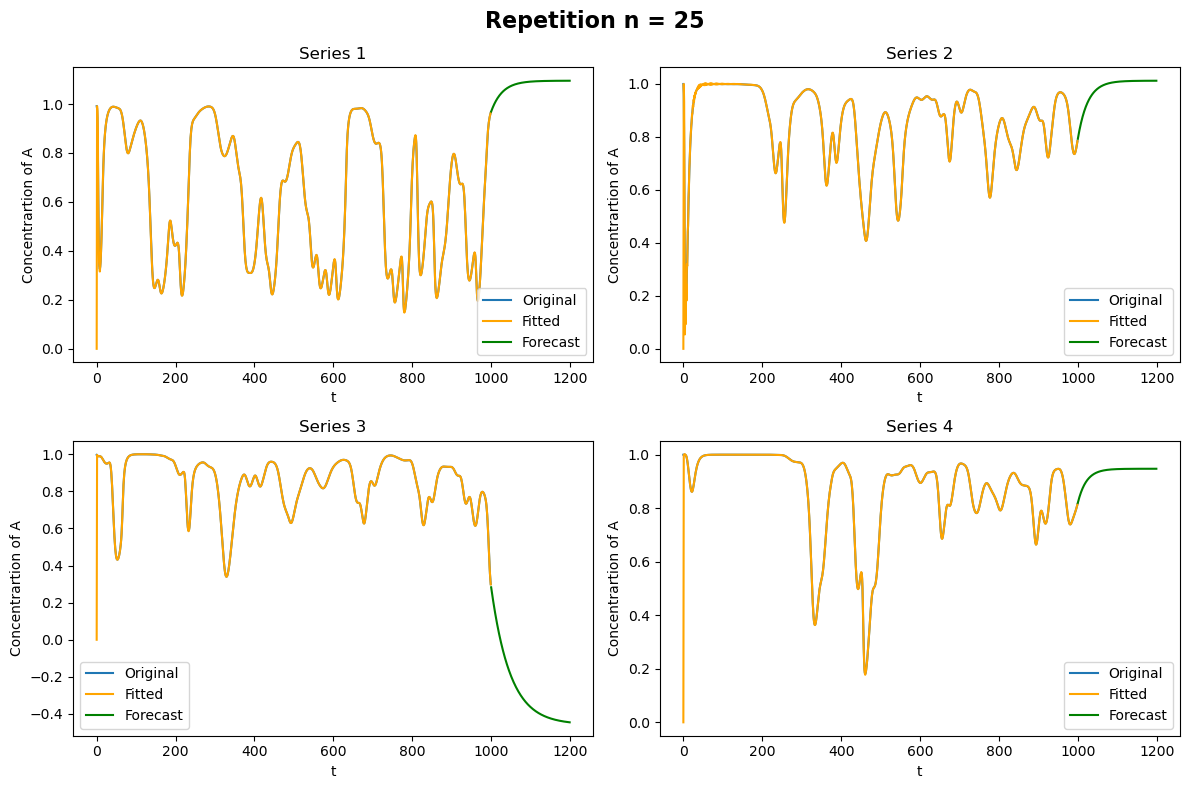

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 panel
axes = axes.flatten()  # flatten into 1D for easy indexing

for idx, i in enumerate(my_series1):
    # Train model
    model = sm.tsa.ARIMA(i, order=(1,1,2))
    m = model.fit()

    # generate predictions
    pred = m.fittedvalues
    forecast = m.forecast(steps=200)
    fx = np.arange(1000, 1000+len(forecast))

    # Plot original signal and autocorrelation in the same panel
    axes[idx].plot(i, label='Original')
    axes[idx].plot(pred, label='Fitted', color='orange')
    axes[idx].plot(fx, forecast, label='Forecast', color='green')
    axes[idx].set_title(f"Series {idx+1}")
    axes[idx].set_xlabel("t")
    axes[idx].set_ylabel(r'Concentrartion of A')
    axes[idx].legend()

fig.suptitle("Repetition n = 25", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()
plt.close()


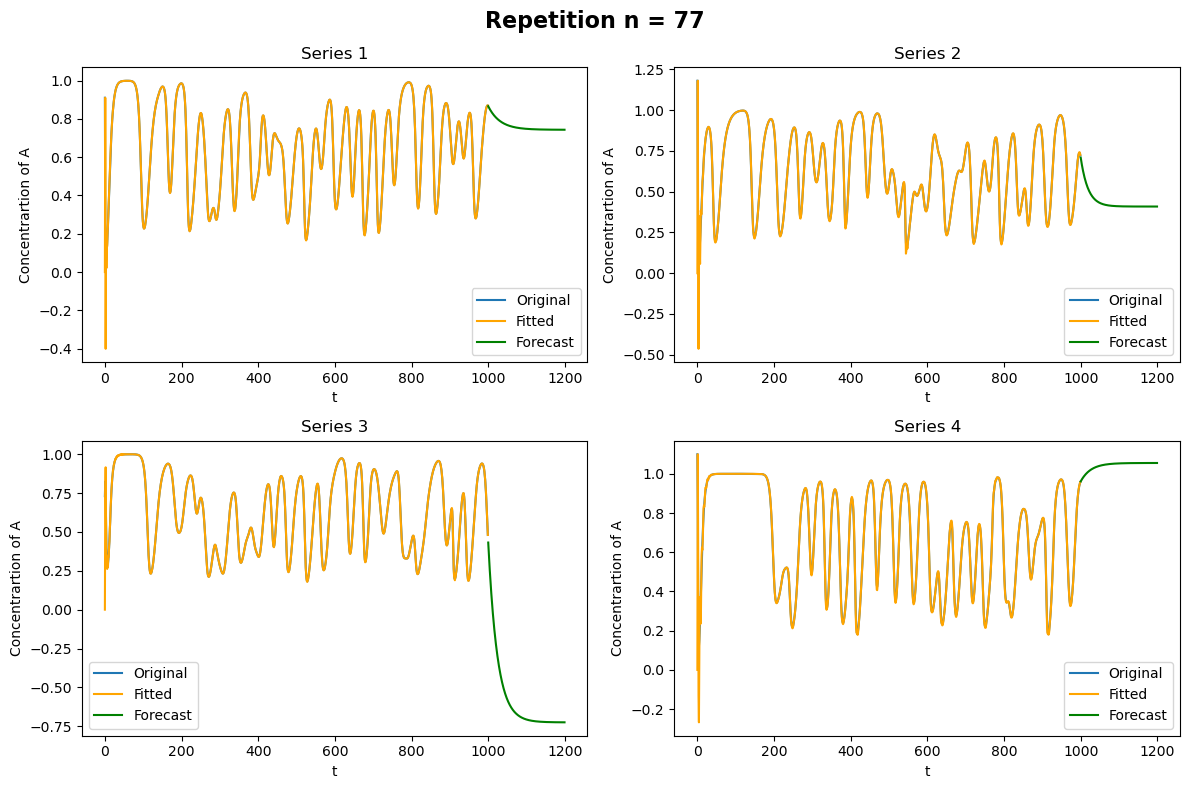

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 panel
axes = axes.flatten()  # flatten into 1D for easy indexing

for idx, i in enumerate(my_series2):
    # Train model
    model = sm.tsa.ARIMA(i, order=(1,1,2))
    m = model.fit()

    # generate predictions
    pred = m.fittedvalues
    forecast = m.forecast(steps=200)
    fx = np.arange(1000, 1000+len(forecast))

    # Plot original signal and autocorrelation in the same panel
    axes[idx].plot(i, label='Original')
    axes[idx].plot(pred, label='Fitted', color='orange')
    axes[idx].plot(fx, forecast, label='Forecast', color='green')
    axes[idx].set_title(f"Series {idx+1}")
    axes[idx].set_xlabel("t")
    axes[idx].set_ylabel(r'Concentrartion of A')
    axes[idx].legend()

fig.suptitle("Repetition n = 77", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()
plt.close()


The ARIMA model fits very well the data, but since these behaviors are very sort memory the forecast is not that accurate after a large time. 

## **8. Fourier Transform**
- Apply the FFT to each time series.
- Plot the frequency spectrum.
- Identify dominant frequencies and discuss physical meaning.

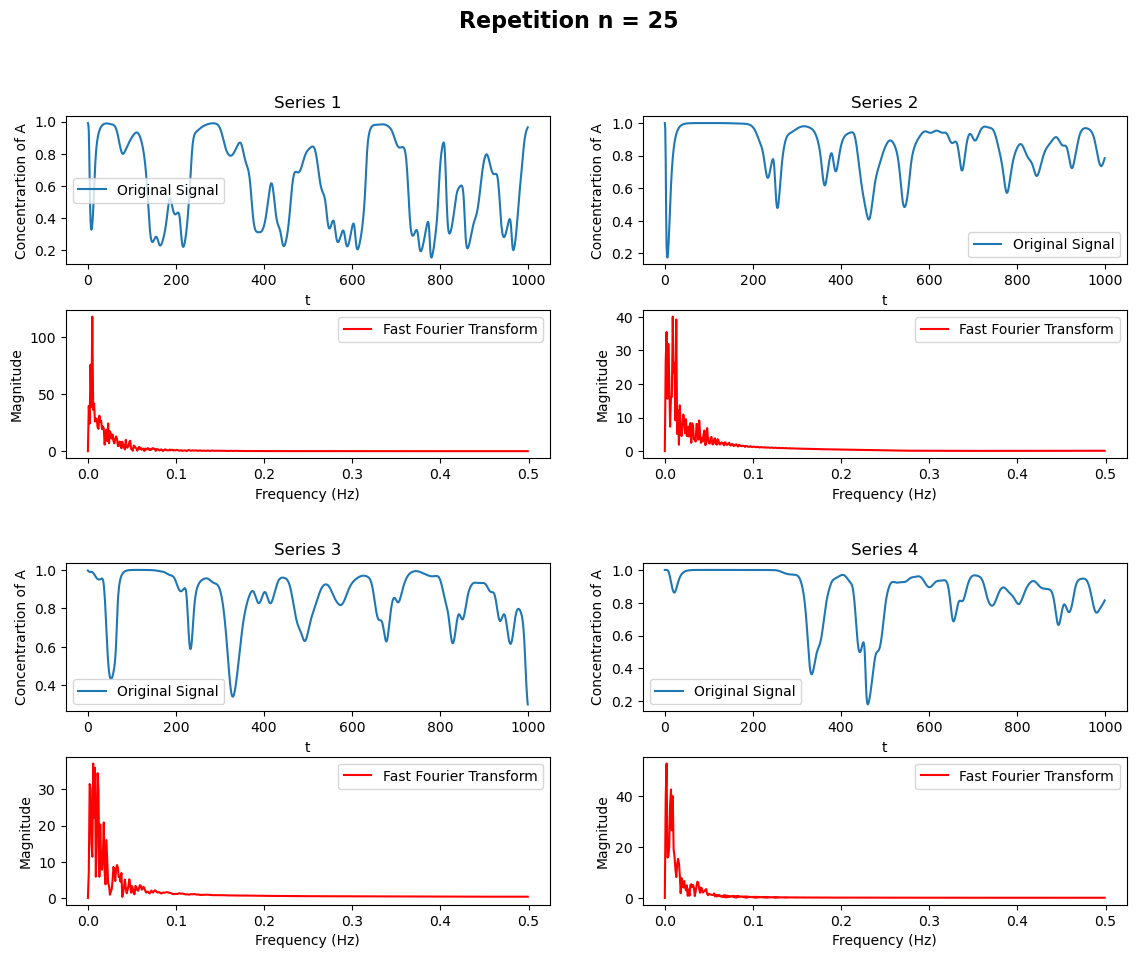

In [15]:
from numpy.fft import fft, fftfreq

fig = plt.figure(figsize=(12, 10))

for idx, i in enumerate(my_series1):
    # Compute FFT
    x = i - np.mean(i)
    yf = fft(x)
    xf = fftfreq(len(x),1)

    # Define where this block of 2x1 subplots goes in the 2x2 grid
    outer = gridspec.GridSpec(2, 2, figure=fig)   # 2x2 grid overall
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[idx])  # each cell = 2x1

    # Top subplot: original signal
    ax0 = fig.add_subplot(inner[0])
    ax0.plot(i, label="Original Signal")
    ax0.set_xlabel("t")
    ax0.set_ylabel(r'Concentrartion of A')
    ax0.legend()

    # Bottom subplot: autocorrelation
    ax1 = fig.add_subplot(inner[1])
    ax1.plot(xf[:len(x)//2],np.abs(yf[:len(x)//2]), color='red', label = 'Fast Fourier Transform') 
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel(r"Magnitude")
    ax1.legend()
    # Add title for the block
    ax0.set_title(f"Series {idx+1}")

fig.suptitle("Repetition n = 25", fontsize=16, weight="bold")
plt.tight_layout(pad=3)
plt.show()
plt.close()

We observe how the domimant frequencies are very small and close to 0 and this is a tendency common for all points.

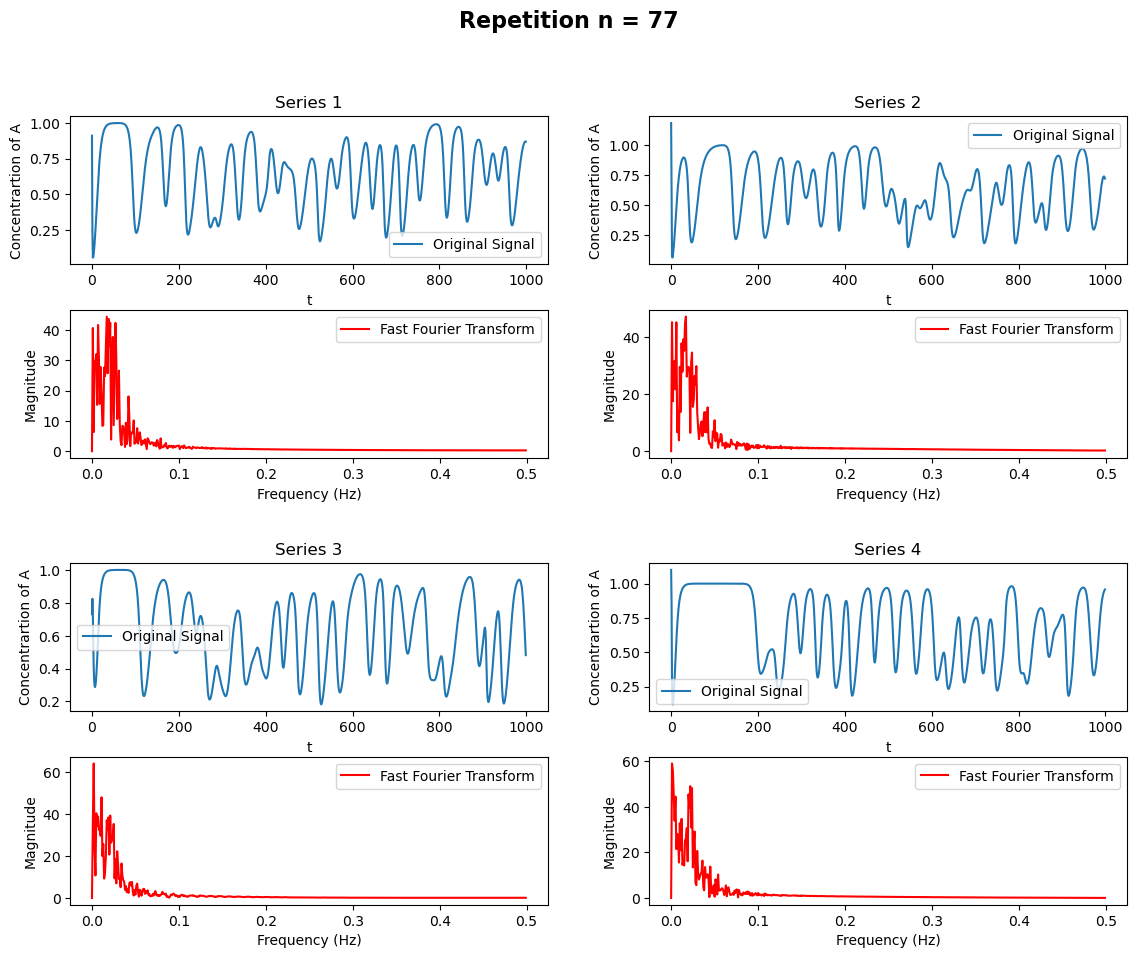

In [16]:
fig = plt.figure(figsize=(12, 10))

for idx, i in enumerate(my_series2):
    # Compute FFT
    x = i - np.mean(i)
    yf = fft(x)
    xf = fftfreq(len(x),1)

    # Define where this block of 2x1 subplots goes in the 2x2 grid
    outer = gridspec.GridSpec(2, 2, figure=fig)   # 2x2 grid overall
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[idx])  # each cell = 2x1

    # Top subplot: original signal
    ax0 = fig.add_subplot(inner[0])
    ax0.plot(i, label="Original Signal")
    ax0.set_xlabel("t")
    ax0.set_ylabel(r'Concentrartion of A')
    ax0.legend()

    # Bottom subplot: autocorrelation
    ax1 = fig.add_subplot(inner[1])
    ax1.plot(xf[:len(x)//2],np.abs(yf[:len(x)//2]), color='red', label = 'Fast Fourier Transform') 
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel(r"Magnitude")
    ax1.legend()
    # Add title for the block
    ax0.set_title(f"Series {idx+1}")

fig.suptitle("Repetition n = 77", fontsize=16, weight="bold")
plt.tight_layout(pad=3)
plt.show()
plt.close()

We obserbe for this repetition still very small dominant frequencies but a slightly large present of frequencies close to 0.25 apart form the ones close to 0 that were the only ones existing in repetition 25.

## **9. Wavelet Transform**
- Perform a Continuous Wavelet Transform (CWT) using a Morlet or Complex Morlet wavelet.
- Plot the scalogram.
- Highlight when and where bursts of activity occur.

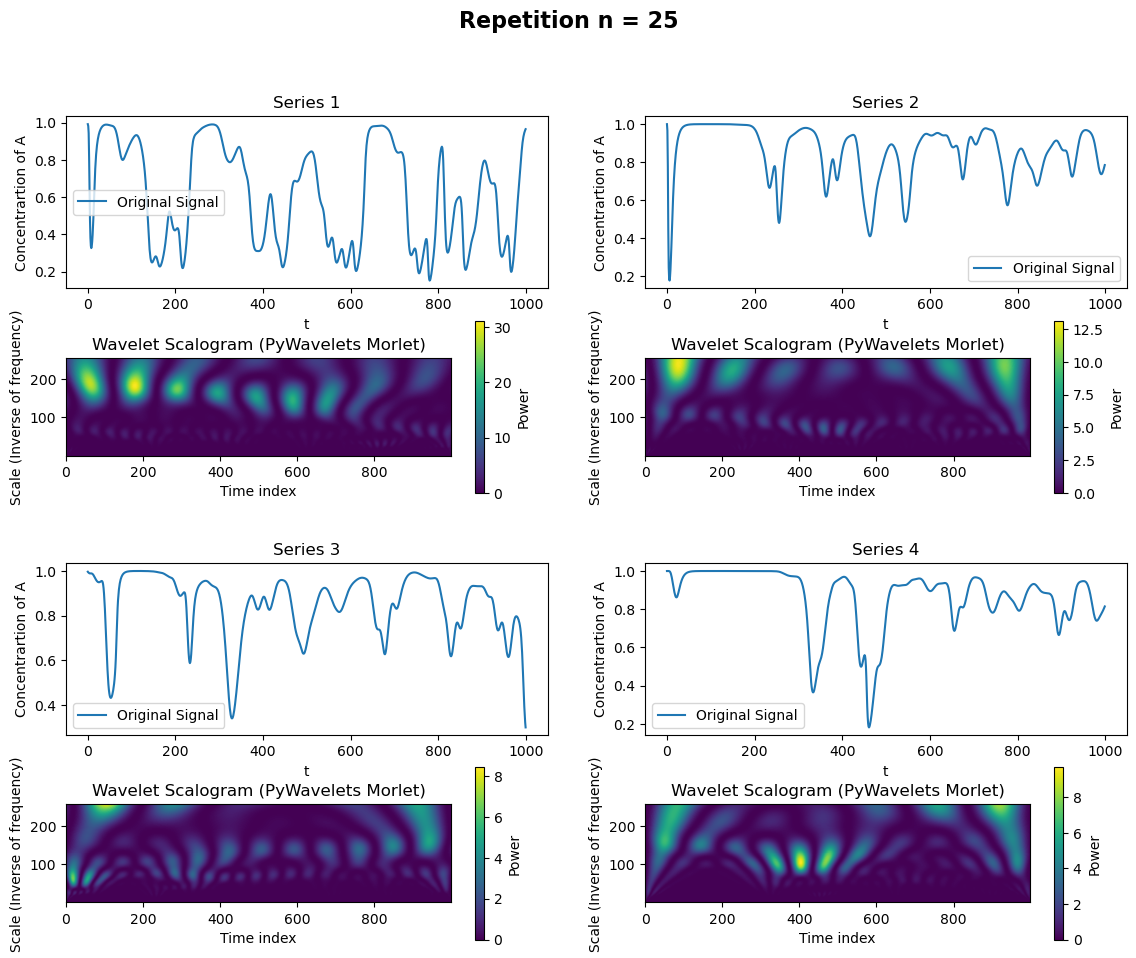

In [17]:
try:
    import pywt
    HAVE_PYWT = True
except Exception:
    HAVE_PYWT = False

fig = plt.figure(figsize=(12, 10))

for idx, i in enumerate(my_series1):
    series = i
    t = np.arange(len(series))
    # PyWavelets CWT with Morlet
    scales = np.arange(1, 256)
    coefficients, freqs_w = pywt.cwt(series, scales=scales, wavelet='morl')
    power_w = (np.abs(coefficients))**2

    # Define where this block of 2x1 subplots goes in the 2x2 grid
    outer = gridspec.GridSpec(2, 2, figure=fig)   # 2x2 grid overall
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[idx], height_ratios=[1,1],width_ratios=[1])  # each cell = 2x1

    # Top subplot: original signal
    ax0 = fig.add_subplot(inner[0])
    ax0.plot(i, label="Original Signal")
    ax0.set_xlabel("t")
    ax0.set_ylabel(r'Concentrartion of A')
    ax0.legend()

    # Bottom subplot: autocorrelation
    ax1 = fig.add_subplot(inner[1])
    im = ax1.imshow(power_w, aspect='equal', origin='lower', extent=[t[0], t[-1], scales[0], scales[-1]])
    ax1.set_aspect('equal')
    ax1.set_xlabel('Time index')
    ax1.set_ylabel('Scale (Inverse of frequency)')
    ax1.set_title('Wavelet Scalogram (PyWavelets Morlet)')
    fig.colorbar(im, ax=ax1, label='Power')
    # Add title for the block
    ax0.set_title(f"Series {idx+1}")

fig.suptitle("Repetition n = 25", fontsize=16, weight="bold")
plt.tight_layout(pad=3)
plt.show()
plt.close()

In all waves we can see how till time aroound 300 we have a dominant presence of low frequencies, while at the end (after time 800) we have the burst of activity in which frequencies increase significantly.

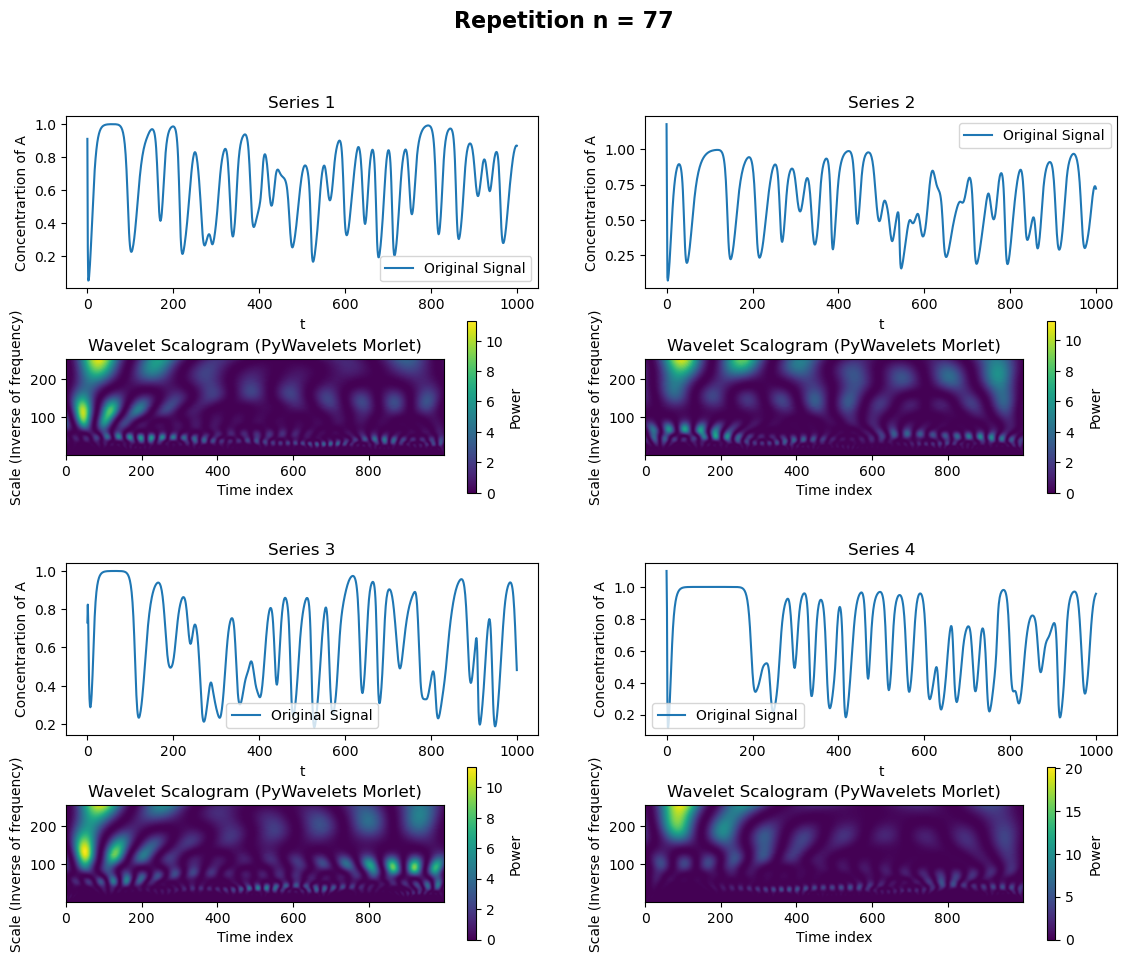

In [18]:
fig = plt.figure(figsize=(12, 10))

for idx, i in enumerate(my_series2):
    series = i
    t = np.arange(len(series))
    # PyWavelets CWT with Morlet
    scales = np.arange(1, 256)
    coefficients, freqs_w = pywt.cwt(series, scales=scales, wavelet='morl')
    power_w = (np.abs(coefficients))**2

    # Define where this block of 2x1 subplots goes in the 2x2 grid
    outer = gridspec.GridSpec(2, 2, figure=fig)   # 2x2 grid overall
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[idx], height_ratios=[1,1],width_ratios=[1])  # each cell = 2x1

    # Top subplot: original signal
    ax0 = fig.add_subplot(inner[0])
    ax0.plot(i, label="Original Signal")
    ax0.set_xlabel("t")
    ax0.set_ylabel(r'Concentrartion of A')
    ax0.legend()

    # Bottom subplot: autocorrelation
    ax1 = fig.add_subplot(inner[1])
    im = ax1.imshow(power_w, aspect='equal', origin='lower', extent=[t[0], t[-1], scales[0], scales[-1]])
    ax1.set_aspect('equal')
    ax1.set_xlabel('Time index')
    ax1.set_ylabel('Scale (Inverse of frequency)')
    ax1.set_title('Wavelet Scalogram (PyWavelets Morlet)')
    fig.colorbar(im, ax=ax1, label='Power')
    # Add title for the block
    ax0.set_title(f"Series {idx+1}")

fig.suptitle("Repetition n = 77", fontsize=16, weight="bold")
plt.tight_layout(pad=3)
plt.show()
plt.close()

In all waves we can see how till time aroound 300 we have a dominant presence of low frequencies, while at the end (after time 700) we have the burst of activity in which frequencies increase significantly.

## **10. Discussion**
- Compare results from different points.
- Discuss differences between high and low concentration regions.
- Suggest physical interpretations of observed patterns.

### - Compare results from different points.

We observed slightly different results depending on the repetition, whereas within each repetition all time series from different points presented a similar form. In the 2 cases analyzed in this work (repetition 25 and 77), in general, 25’s points have less oscillations than 77’s. 

Autocorrelation Analysis: It provided a good sense of the wave's nature over time, showing small autocorrelation at high times and hence a short term memory in the wave.

ARIMA Modeling: It was relatively easy to find an optimal configuration for the model and it fitted very well creating perfect overlap with the original wave. But due to the wave’s short memory any forecast at long periods of time seemed highly unlikely to be correct.

Fourier Transform: A reliable method for finding the frequency components of the wave, but not very informative since these frequencies change highly over time.

Wavelet Transform: The best method for describing this type of wave since we could tell how the wave’s behaviour was changing over time recognizing high and low frequency regions as well as transition zones.

### - Discuss differences between high and low concentration regions.

Long term high concentration regions are the ones in which its time series oscillates a lot since there the traveling waves of the reaction collide frequently. Whereas low concentration regions correspond to points whose time series present low frequencies since they are away from wave epicenters.

### - Suggest physical interpretations of observed patterns.

Low frequency time series correspond to points away from the reaction wave epicenters.
High frequency time series correspond to points close to reaction wave epicenters or zones in which these waves collide.